In [1]:
from sqlalchemy import create_engine,text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
db_user = ""
db_password = ""
db_host = "" 
db_port = ""  
db_name = ""

In [3]:
connection = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection)

ANALISI FASCE ETA

In [5]:
query_toid = text("""
SELECT DATE(datefrom) AS date,
       SUM(f1) AS "Minorenni",
       SUM(f2) AS "18-30",
       SUM(f3) AS "31-40",
       SUM(f4) AS "41-50",
       SUM(f5) AS "51-60",
       SUM(f6) AS ">60"
FROM movements
GROUP BY date
ORDER BY date;
""")

try:
    with engine.connect() as connection:
        result = connection.execute(query_toid)
        df_toid = pd.DataFrame(result.fetchall(), columns=result.keys())
        print(df_toid)
except Exception as e:
    print(f"Errore durante l'esecuzione della query: {e}")

          date  Minorenni   18-30   31-40    41-50    51-60      >60
0   2019-08-01      57289  628377  691478  1376205  1413053  2030079
1   2019-08-02      55111  601847  662930  1328206  1365630  1967164
2   2019-08-03      51078  551943  603834  1229600  1268005  1864169
3   2019-08-04      41614  459063  497224  1045193  1075728  1580113
4   2019-08-05      50938  558147  613469  1241431  1284633  1872694
..         ...        ...     ...     ...      ...      ...      ...
56  2019-09-26      75017  742990  743426  1458747  1499099  2169583
57  2019-09-27      75294  724864  725344  1431768  1470023  2129410
58  2019-09-28      71445  693118  696813  1382198  1420257  2075800
59  2019-09-29      53484  579159  580752  1184945  1219228  1763340
60  2019-09-30      75329  744144  739674  1443066  1485513  2154206

[61 rows x 7 columns]


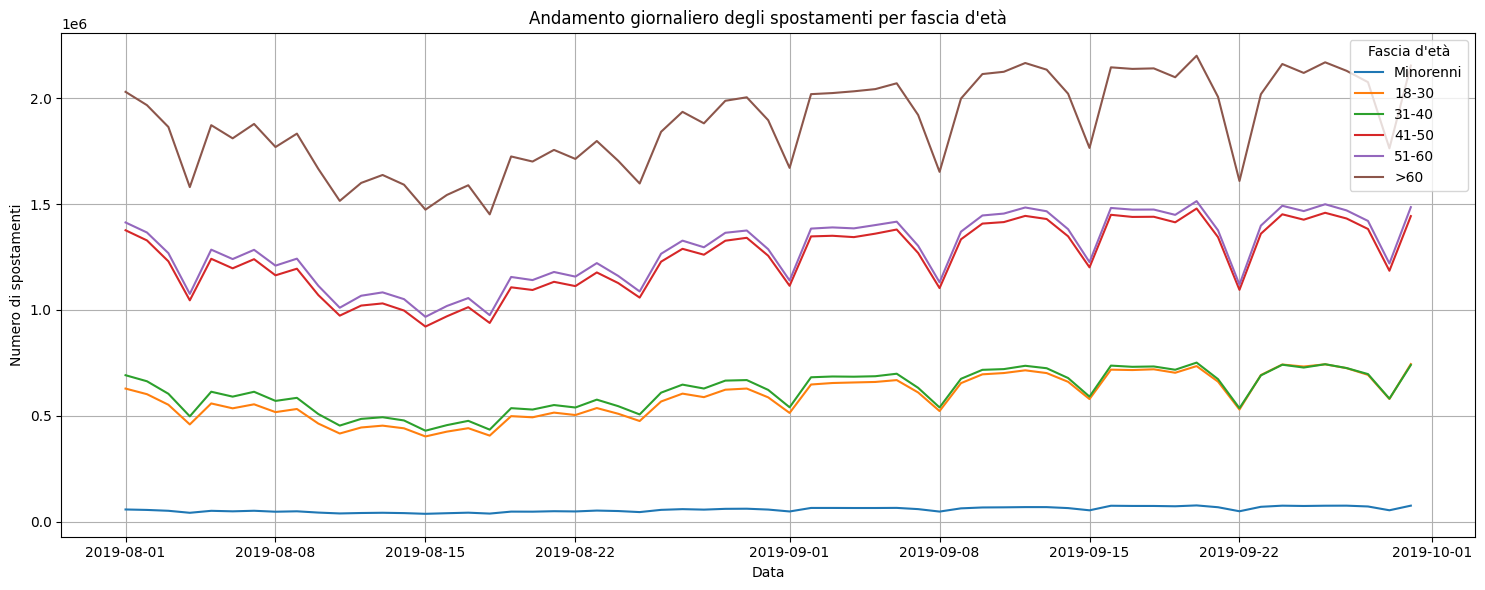

In [6]:
df_toid.set_index('date', inplace=True)
df_toid.plot(figsize=(15, 6))
plt.title("Andamento giornaliero degli spostamenti per fascia d'età")
plt.ylabel("Numero di spostamenti")
plt.xlabel("Data")
plt.grid(True)
plt.legend(title="Fascia d'età")
plt.tight_layout()
plt.show()


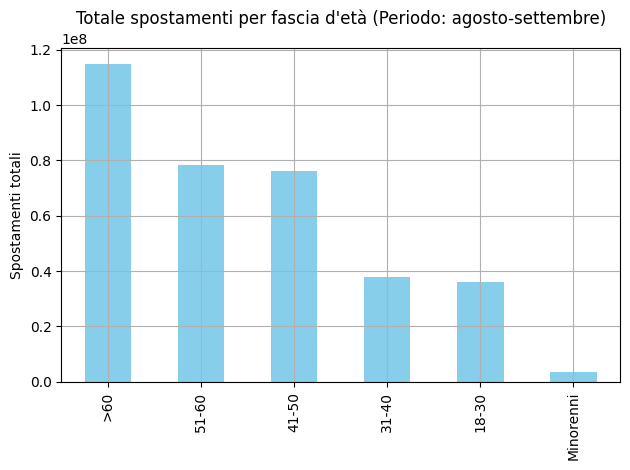

In [7]:
totali = df_toid.sum().sort_values(ascending=False)
totali.plot(kind='bar', color='skyblue')
plt.title("Totale spostamenti per fascia d'età (Periodo: agosto-settembre)")
plt.ylabel("Spostamenti totali")
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
df_toid = df_toid.reset_index()
df_toid['tipo_giorno'] = pd.to_datetime(df_toid['date']).dt.dayofweek.map(lambda x: 'Weekend' if x >= 5 else 'Feriale')
df_melt = df_toid.melt(id_vars=['date', 'tipo_giorno'], var_name='fascia_eta', value_name='spostamenti')
df_media = df_melt.groupby(['fascia_eta', 'tipo_giorno'])['spostamenti'].mean().reset_index()


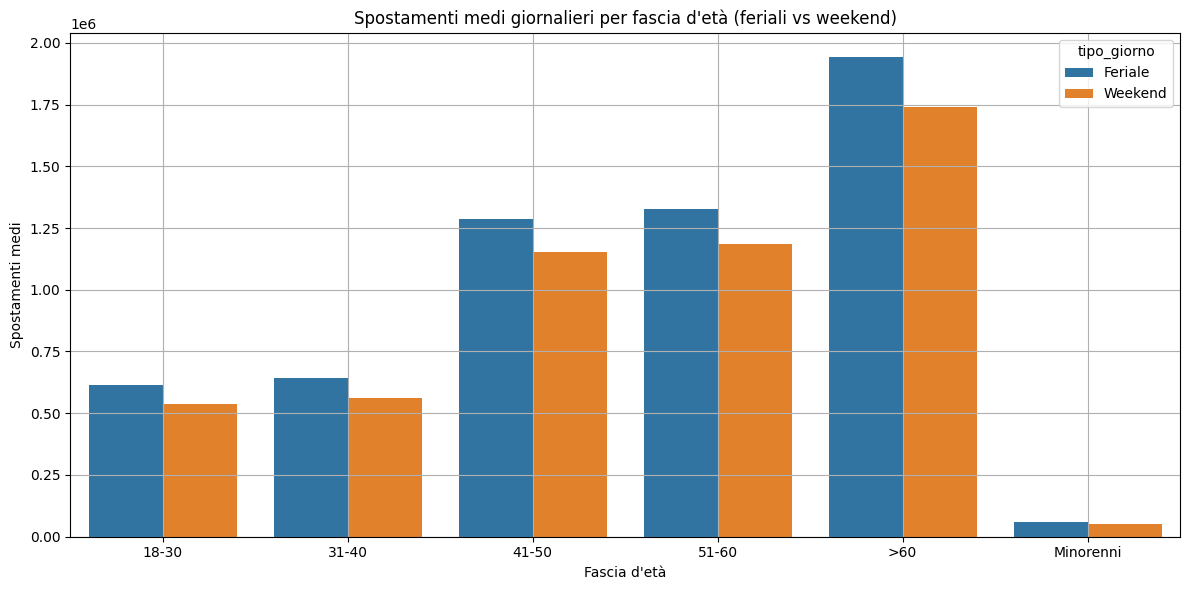

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_media, x='fascia_eta', y='spostamenti', hue='tipo_giorno')
plt.title("Spostamenti medi giornalieri per fascia d'età (feriali vs weekend)")
plt.ylabel("Spostamenti medi")
plt.xlabel("Fascia d'età")
plt.grid(True)
plt.tight_layout()
plt.show()


ANALISI LAVORATORI E STRANIERI

In [11]:
query_lav = text("""
SELECT DATE(datefrom) AS date,
       SUM(tb) AS "Lavoratori"   
FROM movements
GROUP BY date
ORDER BY date;
""")
try:
    with engine.connect() as connection:
        result = connection.execute(query_lav)
        df_lav = pd.DataFrame(result.fetchall(), columns=result.keys())
        print(df_lav)
except Exception as e:
    print(f"Errore durante l'esecuzione della query: {e}")

          date  Lavoratori
0   2019-08-01      783350
1   2019-08-02      739268
2   2019-08-03      592975
3   2019-08-04      458541
4   2019-08-05      656891
..         ...         ...
56  2019-09-26      807295
57  2019-09-27      783384
58  2019-09-28      679751
59  2019-09-29      535205
60  2019-09-30      787052

[61 rows x 2 columns]


In [12]:
query_str = text("""
SELECT DATE(datefrom) AS date,
       SUM(ns) AS "Stranieri"   
FROM movements
GROUP BY date
ORDER BY date;
""")
try:
    with engine.connect() as connection:
        result = connection.execute(query_str)
        df_str = pd.DataFrame(result.fetchall(), columns=result.keys())
        print(df_str)
except Exception as e:
    print(f"Errore durante l'esecuzione della query: {e}")

          date  Stranieri
0   2019-08-01     626263
1   2019-08-02     609196
2   2019-08-03     560918
3   2019-08-04     449239
4   2019-08-05     539075
..         ...        ...
56  2019-09-26     139267
57  2019-09-27     128927
58  2019-09-28     125253
59  2019-09-29      91124
60  2019-09-30     110336

[61 rows x 2 columns]


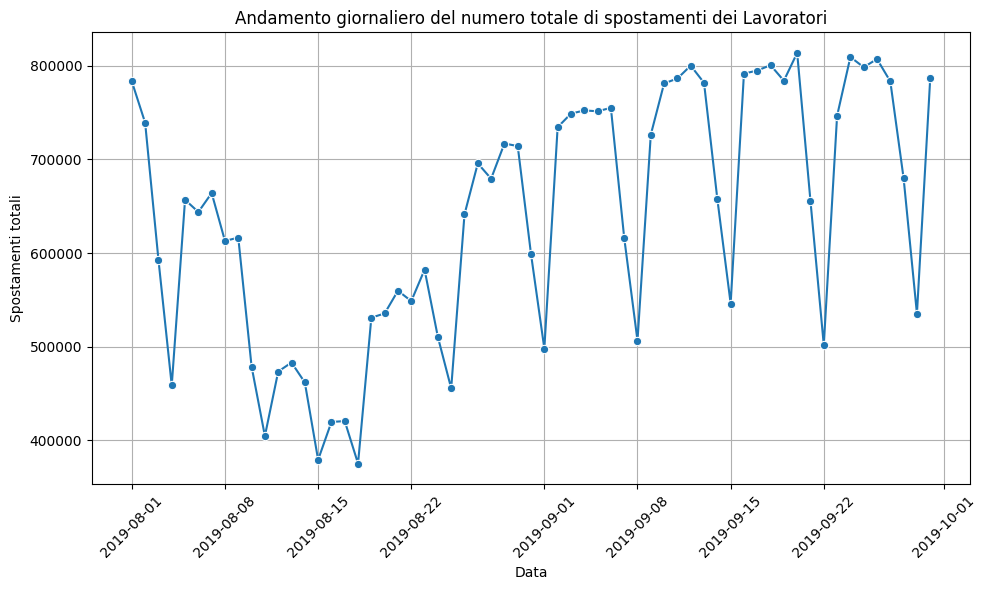

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_lav, x='date', y='Lavoratori', marker='o')
plt.title("Andamento giornaliero del numero totale di spostamenti dei Lavoratori")
plt.xlabel("Data")
plt.ylabel("Spostamenti totali")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


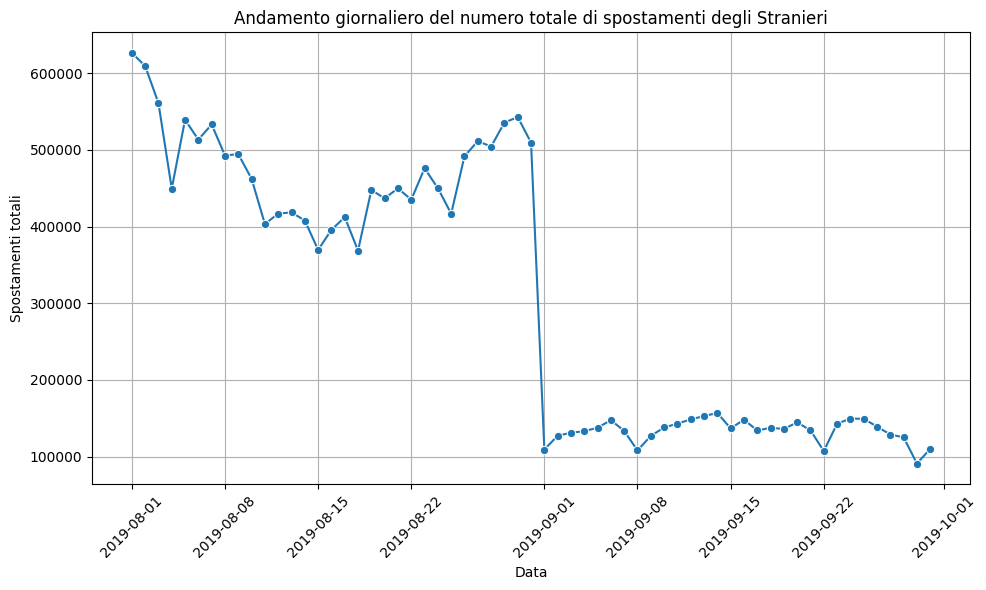

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_str, x='date', y='Stranieri', marker='o')
plt.title("Andamento giornaliero del numero totale di spostamenti degli Stranieri")
plt.xlabel("Data")
plt.ylabel("Spostamenti totali")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()